<a href="https://colab.research.google.com/github/tosiaki12/python_test/blob/main/cntltest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install control
#google colabで実行するときはまずインストールする

In [ ]:

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


import numpy as np
def init_grids(ippen, count):
    re_range, im_range = np.linspace(-ippen,ippen,count), np.linspace(-ippen,ippen,count)
    re_grid, im_grid = np.meshgrid(re_range, im_range)
    com_grid = re_grid + im_grid*1j#<class 'numpy.ndarray'> (29, 29)
    return com_grid



In [ ]:
#sympy関係
import sympy as sp
sp.init_printing()
s = sp.Symbol('s')
root = sp.solve(2*s**2 + 5*s + 3, s)
print(root)
print(type(root))
sa = 2*s**3 + 5*s - 1
print(type(sa))
print(sa)
sa
t = sp.Symbol('t')
tfunc = 4*t**3 + 3*t**2 + 1
sfunc = sp.laplace_transform(tfunc,t,s)
print(sfunc)
print(type(sfunc[0]))
import control.matlab as mt
sys = mt.tf([0,0,1,2,3],[1,2,5,0,1])
p = mt.poles(sys)
print(sys)
print(p)

[-3/2, -1]
<class 'list'>
<class 'sympy.core.add.Add'>
2*s**3 + 5*s - 1
(1/s + 6/s**3 + 24/s**4, 0, True)
<class 'sympy.core.add.Add'>

     s^2 + 2 s + 3
-----------------------
s^4 + 2 s^3 + 5 s^2 + 1

[-1.04211262+1.97193338j -1.04211262-1.97193338j  0.04211262+0.44637535j
  0.04211262-0.44637535j]


In [ ]:
t = sp.Symbol('t',positive=True)
A = np.array([[-1,0],[1,-2]])
G = s*sp.eye(2) - A
print(G)
exp_At = sp.inverse_laplace_transform(sp.simplify(G.inv()),s,t)
print(exp_At)
exp_At

Matrix([[s + 1, 0], [-1, s + 2]])
Matrix([[exp(-t), 0], [exp(-t) - exp(-2*t), exp(-2*t)]])


⎡     -t           ⎤
⎢    ℯ          0  ⎥
⎢                  ⎥
⎢ -t    -2⋅t   -2⋅t⎥
⎣ℯ   - ℯ      ℯ    ⎦

<class 'control.iosys.LinearIOSystem'> <class 'control.timeresp.TimeResponseData'>


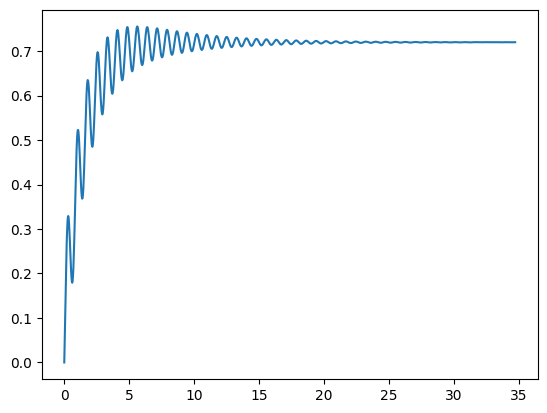

In [ ]:
import control as ct
import matplotlib.pyplot as plt
sys = ct.rss(4, 1, 1)
response = ct.step_response(sys)
#plt.plot(response.time, response.outputs)
print(type(sys), type(response))
t, y = ct.step_response(sys)
plt.plot(t, y)

[-1.04211262+1.97193338j -1.04211262-1.97193338j  0.04211262+0.44637535j
  0.04211262-0.44637535j]
2.2303631913906172
2.2303631913906172
0.4483574710433173
0.4483574710433173


Text(0, 0.5, 'Im')

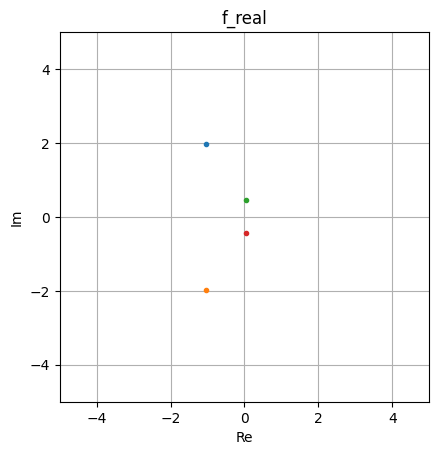

In [ ]:
fig1 = plt.figure()
ax11 = fig1.add_subplot()
ax11.set_aspect('equal')
plt.xlim(-5,5) #ax1ではエラー
plt.ylim(-5,5)
ax11.grid()
print(p)
for i in p:
    print(np.abs(i))
    ax11.plot(np.real(i),np.imag(i),marker='.')
#ax11.plot(np.real(com_grid), np.imag(com_grid), np.real(ans_fixed_p),cmap=color)#, rcount=200,ccount=200)
ax11.set_title('f_real')
ax11.set_xlabel("Re")
ax11.set_ylabel("Im")

In [8]:
import control
from control.matlab import *
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=4,floatmode='maxprec')

#2024年4月1日
A = [[0,1],[-2,-1]]; B = [[0],[3]]; C = [1,4]; D = [0]
print('状態空間表現')
sys1ss = ss(A,B,C,D)
print(sys1ss)

sys1tf = ss2tf(sys1ss)
print('伝達関数表現:', sys1tf)
sys1tf.ninputs

状態空間表現
<StateSpace>: sys[6]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[ 0.  1.]
     [-2. -1.]]

B = [[0.]
     [3.]]

C = [[1. 4.]]

D = [[0.]]

伝達関数表現: <TransferFunction>: sys[7]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


 12 s + 3
-----------
s^2 + s + 2



1

latexテスト
$$\frac{d}{dt}f(x) = Ax$$


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 3.4 MB/s eta 0:00:00


In [ ]:
A = "1 1 2;2 1 1;3 4 5"
print(A)
print(type(A))
B = "2;0;1"
C = "1 1 0"
P = mt.ss(A,B,C,'0')
print(P)

1 1 2;2 1 1;3 4 5
<class 'str'>
<LinearIOSystem>: sys[4]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (3): ['x[0]', 'x[1]', 'x[2]']

A = [[1. 1. 2.]
     [2. 1. 1.]
     [3. 4. 5.]]

B = [[2.]
     [0.]
     [1.]]

C = [[1. 1. 0.]]

D = [[0.]]



In [ ]:
S1 = mt.tf([0,1],[1,1])
S2 = mt.tf([1,1],[1,1,1])
S = S2*S1
print(S)
S = S.minreal()
print(S)


        s + 1
---------------------
s^3 + 2 s^2 + 2 s + 1


     1
-----------
s^2 + s + 1



In [ ]:
s = sp.Symbol()

NameError: name 'sp' is not defined